## workflow of tensors 

In [2]:
import torch 
from torch import nn # nn contains the all of the pytorch's building blocks for the neural networks 
import matplotlib.pyplot as plt 

torch.__version__

'2.1.1+cpu'

In [4]:
#creating known parameters 
weight = 0.7 
bias = 0.3

start = 0 
end = 1 
step = 0.02 

X = torch.arange(start , end , step).unsqueeze(dim=1)
y = weight*X + bias
X , y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
         [

In [5]:
len(X) , len(y)

(50, 50)

### splitting the data into test and train to train our model and test it 

In [8]:
# using the ratio of 80-20 % 
train_split = int(0.8* len(X))
X_train , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]

In [10]:
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(40, 10, 40, 10)

In [22]:
def plot_predictions(train_data = X_train , train_labels = y_train , test_data = X_test , test_labels = y_test , predictions = None):
    plt.figure(figsize=(10,7))
    plt.scatter(x=train_data ,y=train_labels , c="b",label = "TRAINING DATA")
    plt.scatter(x=test_data , y=test_labels , c="r" , label="TEST DATA")
    if predictions is not None:
        plt.scatter(x=test_labels , y = predictions , c="g" , label="PREDICTIONS")
    plt.legend()
    plt.title("SCATTER PLOT OF TRAIN TEST AND PREDICTED DATA ")
    plt.show()

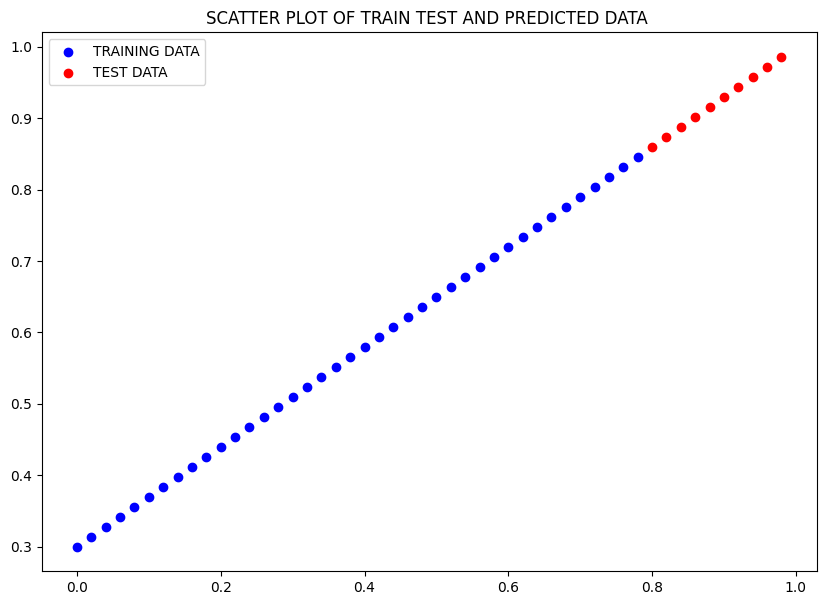

In [21]:
plot_predictions()

## MAKING FIRST LINEAR MODEL USING PYTORCH 

what will our model do :
1. start with random values (for weights and bias )
2. adjust those random values of the weights and bias by looking at the training data to get much more closer to the ideal values 

** HOW DOES IT DO IT ?**
1. through gradient descent 
2. back propogation 


In [29]:
import torch
from torch import nn

class LinearRegressionModel(nn.Module):  # almost everything in pytorch inherits from the nn.Module class, also the base class for all the modules
    def __init__(self):
        super().__init__()  # Corrected the super call
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    # forward method to define the computation in the model 
    def forward(self, x: torch.Tensor) -> torch.Tensor:  # Corrected indentation
        return self.weights * x + self.bias
    # forward method should always be there in the nn.Module, it defines the computation to be performed at each call


## PYTORCH MODEL BUILDING ESSENTIALS 
* torch.nn - contains all the buildings for the computational graphs ( a neural network )
* torch.nn.parameter - what parameter our model should try and learn 
* torch.nn.Module - its a base class for all the neural network modules , if you subclass it , you should also include forward method in it 
* torch.optim - this where the optimizers in ptorch live , and they will help with gradient descent 
* def forward() - all nn.Module subclasses require you to override the forward() method , this method defines what happens in the forward computations 


In [35]:
#create a manual random seed 
torch.manual_seed(42)

# create an instance of the model which we created 
model_0 = LinearRegressionModel()
model_0

LinearRegressionModel()

In [36]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [37]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [38]:
weight, bias

(0.7, 0.3)

### making predictions using `torch.inference_mode()`  
to check our models predictive power , lets see how well it predicts our y test on the basis of x test 
when we pass the data through our model , its going to run it through the `forward` method 

In [42]:
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [40]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

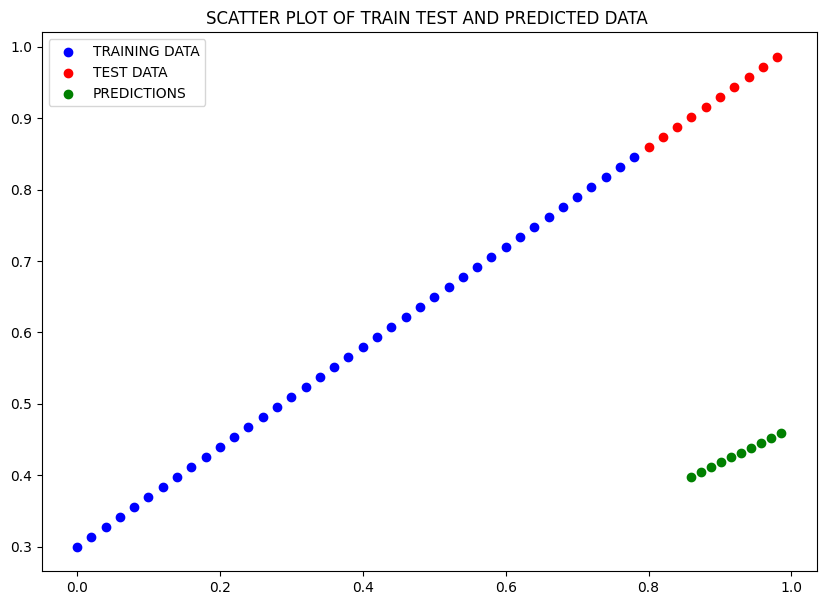

In [41]:
plot_predictions(predictions=y_preds)

In [43]:
# we can also do something similar to the above thing with torch.no_grad() , however , torch.inference_mdoe() is usually more preferred 
with torch.no_grad():
    y_pred_no_grad = model_0(X_test)

y_pred_no_grad

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

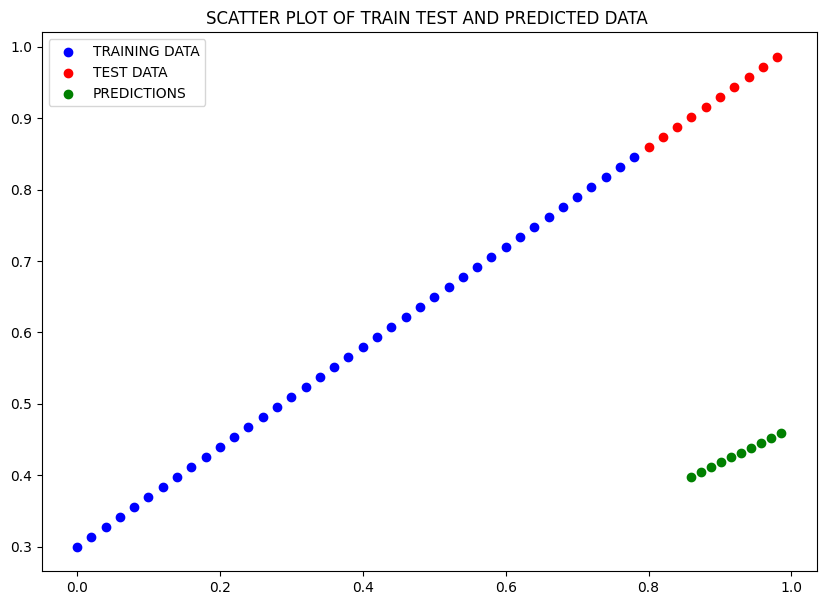

In [44]:
plot_predictions(predictions=y_pred_no_grad)

## training our model 
the whole idea of training is to move our parameters from some `unknown` parameters to some `known` parameters 

 *note* , the loss function can also be called as the cost function in some area or criterions 
 things we need in our model 
 * *LOSS FUNCTION* : a function to measure how bad our model's predictions are as compared to the test dataset 
 * *OPTIMISER* : takes into account the loss of the model and adjusts the model parameters 

and specifically , for pytorch we need a training loop and a testing loop 

In [45]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [46]:
# setup a loss function 
loss_fn = nn.L1Loss()

# setup an optimiser 


L1Loss()